<a href="https://colab.research.google.com/github/code-by-shivam/Blogify/blob/main/Toys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [5]:
df.shape

(100, 4)

In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [8]:
import matplotlib.pyplot as plt

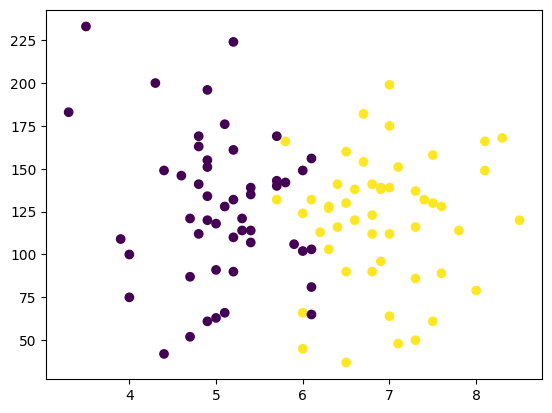

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [12]:
x

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [13]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [14]:
x.shape

(100, 2)

In [15]:
y.shape

(100,)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [18]:
x_train

,cgpa,iq
45,6.0,66
56,6.1,65
92,5.2,110
6,5.7,143
42,7.6,89
...,...,...
44,7.5,61
3,7.4,132
55,7.8,114
51,4.8,141


In [19]:
y_train

,placement
45,1
56,0
92,0
6,0
42,1
...,...
44,1
3,1
55,1
51,0


In [20]:
from sklearn.preprocessing import StandardScaler


In [21]:
scaler=StandardScaler()

In [22]:
x_train=scaler.fit_transform(x_train)

In [23]:
x_train

array([[ 0.01183018, -1.4843475 ],
       [ 0.10055651, -1.51028251],
       [-0.69798051, -0.34320673],
       [-0.25434883,  0.51264884],
       [ 1.43145156, -0.8878421 ],
       [ 0.45546186,  0.17549362],
       [-0.96415952,  1.88720477],
       [ 0.72164087, -0.2913367 ],
       [ 0.81036721, -0.70629697],
       [-0.52052784,  0.40890877],
       [-1.49651754,  1.99094484],
       [-1.14161219, -0.93971213],
       [-0.25434883,  0.43484379],
       [ 0.45546186,  0.95354414],
       [-0.69798051,  0.97947916],
       [-2.3837809 ,  1.55004954],
       [-2.20632823,  2.84680041],
       [ 1.43145156,  0.12362358],
       [ 0.5441882 , -0.08385656],
       [ 0.45546186, -2.236463  ],
       [ 0.36673552, -0.18759663],
       [-0.96415952, -1.61402258],
       [ 0.10055651, -0.52475185],
       [-0.96415952,  0.27923369],
       [-1.14161219, -1.84743774],
       [ 0.5441882 ,  0.38297376],
       [ 0.81036721,  0.40890877],
       [-1.76269655, -0.6025569 ],
       [ 0.63291453,

In [24]:
x_test=scaler.transform(x_test)

In [25]:
x_test

array([[-1.4077912 , -2.10678792],
       [ 1.34272522,  0.17549362],
       [-0.69798051,  2.61338526],
       [-0.87543319, -0.83597206],
       [-0.52052784, -0.23946666],
       [ 0.01183018, -0.55068687],
       [ 0.27800919,  0.09768857],
       [ 2.22998859, -0.08385656],
       [-0.87543319, -0.13572659],
       [ 0.89909354,  1.96500982]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf=LogisticRegression()

In [29]:
clf.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred = clf.predict(x_test)

In [35]:
y_test

,placement
96,0
83,1
16,0
25,0
41,0
62,0
70,1
69,1
67,0
26,1


In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.9

In [38]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

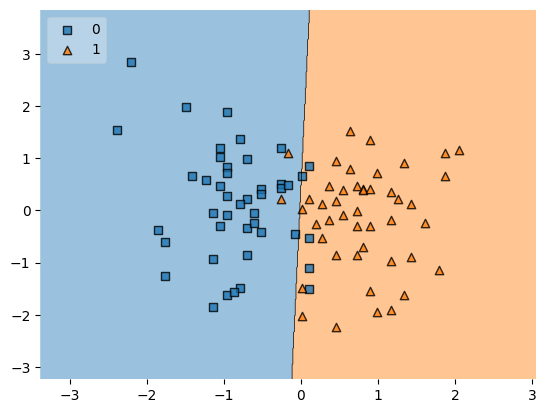

In [39]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf,open('model.pkl','wb'))